# Data Storytelling<a id='Data_Storytelling'></a>

## Contents<a id='Contents'></a>
* [Data Storytelling](#Data_Storytelling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load the Data](#Load_the_Data)
  * [Explore the Data](#Explore_the_Data)
  * [Data Wrangling](#Data_Wrangling)
  * [Overall Analytics](#Overall_Analytics)
  * [Race, Gender, Age, and Nationality](#Race_Gender_Age_and_Nationality)
  * [Salary, Experience, and Positions](#Salary_Experience_and_Positions)
  * [Summary](#Summary)

## Introduction<a id='Introduction'></a>

The following is a data presentation using an example dataset reflecting values corresponding to a typical company's human resources department. As will be shown, the dataset contains information on features such as position title, age, gender, salary, and department, among others. This data gives some interesting insights into the company and as such I will focus on a few different areas. First, I'll look at race, gender, age, and nationality and how they interact. Next, I will look at salary, experience, and the positions that the personnel have. Some questions I will be interested in answering are things like, "How does salary differ between ethnicity, age, and gender?" and "What is the salary distribution between employees with different levels of experience?".

## Imports<a id='Imports'></a>

In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

In [2]:
#Location of Dataset
#https://www.kaggle.com/datasets/rhuebner/human-resources-data-set?datasetId=1632&sortBy=voteCount

## Load the Data<a id='Load_the_Data'></a>

In [101]:
hr_data = pd.read_csv('C:/Users/jmhat/Desktop/Coding/DataStory/HRDataset_v14.csv')

## Explore the Data<a id='Explore_the_Data'></a>

In [72]:
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [73]:
#Check the null values of each column
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [74]:
#Get a list of every column name to compare with the listed categories
list(hr_data.columns)

['Employee_Name',
 'EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'Salary',
 'Termd',
 'PositionID',
 'Position',
 'State',
 'Zip',
 'DOB',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'HispanicLatino',
 'RaceDesc',
 'DateofHire',
 'DateofTermination',
 'TermReason',
 'EmploymentStatus',
 'Department',
 'ManagerName',
 'ManagerID',
 'RecruitmentSource',
 'PerformanceScore',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'LastPerformanceReview_Date',
 'DaysLateLast30',
 'Absences']

In [75]:
hr_data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

The following is an explanation of each feature:

Employee Name - Employee’s full name
<br>
EmpID - Employee ID is unique to each employee
<br>
MarriedID - Is the person married (1 or 0 for yes or no)
<br>
MaritalStatusID - Marital status code that matches the text field MaritalDesc
<br>
EmpStatusID - Employment status code that matches text field EmploymentStatus
<br>
DeptID - Department ID code that matches the department the employee works in
<br>
PerfScoreID - Performance Score code that matches the employee’s most recent performance score
<br>
FromDiversityJobFairID - Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no
<br>
Salary - The person’s yearly salary. U.S. Dollars
<br>
Termd - Has this employee been terminated - 1 or 0
<br>
PositionID - An integer indicating the person’s position
<br>
Position - The text name/title of the position the person has
<br>
State - The state that the person lives in
<br>
Zip - The zip code for the employee
<br>
DOB - Date of Birth for the employee
<br>
Sex - M or F
<br>
MaritalDesc - The marital status of the person (divorced, single, widowed, separated, etc)
<br>
CitizenDesc - Label for whether the person is a Citizen or Eligible NonCitizen
<br>
HispanicLatino - Yes or No field for whether the employee is Hispanic/Latino
<br>
RaceDesc - Description/text of the race the person identifies with
<br>
DateofHire - Date the person was hired
<br>
DateofTermination - Date the person was terminated, only populated if, in fact, Termd = 1
<br>
TermReason - A text reason / description for why the person was terminated
<br>
EmploymentStatus - A description/category of the person’s employment status. Anyone currently working full time = Active
<br>
Department - Name of the department that the person works in
<br>
ManagerName - The name of the person’s immediate manager
<br>
ManagerID - A unique identifier for each manager.
<br>
RecruitmentSource - The name of the recruitment source where the employee was recruited from
<br>
PerformanceScore - Performance Score text/category (Fully Meets, Partially Meets, PIP, Exceeds)
<br>
EngagementSurvey - Results from the last engagement survey, managed by our external partner
<br>
EmpSatisfaction - A basic satisfaction score between 1 and 5, as reported on a recent employee satisfaction survey
<br>
SpecialProjectsCount - The number of special projects that the employee worked on during the last 6 months
<br>
LastPerformanceReviewDate - The most recent date of the person’s last performance review.
<br>
DaysLateLast30 - The number of times that the employee was late to work during the last 30 days
<br>
Absences - The number of times the employee was absent from work.

In [76]:
#List unique values for every column
for col in hr_data:
  print(hr_data[col].unique())

['Adinolfi, Wilson  K' 'Ait Sidi, Karthikeyan   ' 'Akinkuolie, Sarah'
 'Alagbe,Trina' 'Anderson, Carol ' 'Anderson, Linda  ' 'Andreola, Colby'
 'Athwal, Sam' 'Bachiochi, Linda' 'Bacong, Alejandro '
 'Baczenski, Rachael  ' 'Barbara, Thomas' 'Barbossa, Hector'
 'Barone, Francesco  A' 'Barton, Nader' 'Bates, Norman' 'Beak, Kimberly  '
 'Beatrice, Courtney ' 'Becker, Renee' 'Becker, Scott' 'Bernstein, Sean'
 'Biden, Lowan  M' 'Billis, Helen' 'Blount, Dianna' 'Bondwell, Betsy'
 'Booth, Frank' 'Boutwell, Bonalyn' 'Bozzi, Charles' 'Brill, Donna'
 'Brown, Mia' 'Buccheri, Joseph  ' 'Bugali, Josephine ' 'Bunbury, Jessica'
 'Burke, Joelle' 'Burkett, Benjamin ' 'Cady, Max ' 'Candie, Calvin'
 'Carabbio, Judith' 'Carey, Michael  ' 'Carr, Claudia  N'
 'Carter, Michelle ' 'Chace, Beatrice ' 'Champaigne, Brian' 'Chan, Lin'
 'Chang, Donovan  E' 'Chigurh, Anton' 'Chivukula, Enola'
 'Cierpiszewski, Caroline  ' 'Clayton, Rick' 'Cloninger, Jennifer'
 'Close, Phil' 'Clukey, Elijian' 'Cockel, James' 'Cole, Sp

## Data Wrangling<a id='Data_Wrangling'></a>

In [102]:
hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire'])
hr_data['DateofTermination'] = pd.to_datetime(hr_data['DateofTermination'])
Experience_list = []
today = date.today()
for index, row in hr_data.iterrows():
    if hr_data['DateofTermination'][index] is pd.NaT:
        a = datetime.combine(today, datetime.min.time()) - hr_data['DateofHire'][index]
        b = a.days
        c = round(b/365.25)
        Experience_list.append(c)
    else:
        a = hr_data['DateofTermination'][index] - hr_data['DateofHire'][index]
        b = a.days
        c = round(b/365.25)
        Experience_list.append(c)

hr_data['Experience'] = Experience_list

In [106]:
hr_data['DOB'] = pd.to_datetime(hr_data['DOB'], format = "%m/%d/%y")
for index, row in hr_data.iterrows():
    if hr_data['DOB'][index].year > today.year:
        a = hr_data['DOB'][index] - relativedelta(years=100)
        hr_data['DOB'][index] = a

In [107]:
Age_list = []
for index, row in hr_data.iterrows():
    age = today.year - hr_data['DOB'][index].date().year - ((today.month, today.day) < (hr_data['DOB'][index].date().month, hr_data['DOB'][index].date().day)) 
    Age_list.append(age)
hr_data['Age'] = Age_list

In [109]:
Data_Analyst = hr_data[(hr_data['Position'] == 'Data Analyst') | (hr_data['Position'] == 'Data Analyst ')]
Production_Technician_I = hr_data[hr_data['Position'] == 'Production Technician I']
Sr_DBA = hr_data[hr_data['Position'] == 'Sr. DBA']
Production_Technician_II = hr_data[hr_data['Position'] == 'Production Technician II']
Software_Engineer = hr_data[hr_data['Position'] == 'Software Engineer']
IT_Support = hr_data[hr_data['Position'] == 'IT Support']
Database_Admin = hr_data[hr_data['Position'] == 'Database Administrator']
Enterprise_Architect = hr_data[hr_data['Position'] == 'Enterprise Architect']
Sr_Accountant = hr_data[hr_data['Position'] == 'Sr. Accountant']
Production_Manager = hr_data[hr_data['Position'] == 'Production Manager']
Accountant_I = hr_data[hr_data['Position'] == 'Accountant I']
Area_Sales_Manager = hr_data[hr_data['Position'] == 'Area Sales Manager']
Software_Engineering_Manager = hr_data[hr_data['Position'] == 'Software Engineering Manager']
BI_Director = hr_data[hr_data['Position'] == 'BI Director']
Director_Operations = hr_data[hr_data['Position'] == 'Director of Operations']
Sr_Network_Engineer = hr_data[hr_data['Position'] == 'Sr. Network Engineer']
Sales_Manager = hr_data[hr_data['Position'] == 'Sales Manager']
BI_Developer = hr_data[hr_data['Position'] == 'BI Developer']
IT_Manager_Support = hr_data[hr_data['Position'] == 'IT Manager - Support']
Network_Engineer = hr_data[hr_data['Position'] == 'Network Engineer']
IT_Director = hr_data[hr_data['Position'] == 'IT Director']
Director_Sales = hr_data[hr_data['Position'] == 'Director of Sales']
Admin_Assistant = hr_data[hr_data['Position'] == 'Administrative Assistant']
Pres_CEO = hr_data[hr_data['Position'] == 'President & CEO']
Sr_BI_Developer = hr_data[hr_data['Position'] == 'Senior BI Developer']
Shared_Services_Manager = hr_data[hr_data['Position'] == 'Shared Services Manager']
IT_Manager_Infra = hr_data[hr_data['Position'] == 'IT Manager - Infra']
Principal_Data_Architect = hr_data[hr_data['Position'] == 'Principal Data Architect']
Data_Architect = hr_data[hr_data['Position'] == 'Data Architect']
IT_Manager_DB = hr_data[hr_data['Position'] == 'IT Manager - DB']
CIO = hr_data[hr_data['Position'] == 'CIO']

## Overall Analytics<a id='Overall_Analytics'></a>

array([[<AxesSubplot:title={'center':'EmpID'}>,
        <AxesSubplot:title={'center':'MarriedID'}>,
        <AxesSubplot:title={'center':'MaritalStatusID'}>,
        <AxesSubplot:title={'center':'GenderID'}>,
        <AxesSubplot:title={'center':'EmpStatusID'}>],
       [<AxesSubplot:title={'center':'DeptID'}>,
        <AxesSubplot:title={'center':'PerfScoreID'}>,
        <AxesSubplot:title={'center':'FromDiversityJobFairID'}>,
        <AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Termd'}>],
       [<AxesSubplot:title={'center':'PositionID'}>,
        <AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'DOB'}>,
        <AxesSubplot:title={'center':'DateofHire'}>,
        <AxesSubplot:title={'center':'DateofTermination'}>],
       [<AxesSubplot:title={'center':'ManagerID'}>,
        <AxesSubplot:title={'center':'EngagementSurvey'}>,
        <AxesSubplot:title={'center':'EmpSatisfaction'}>,
        <AxesSubplot:title={'center':'Spec

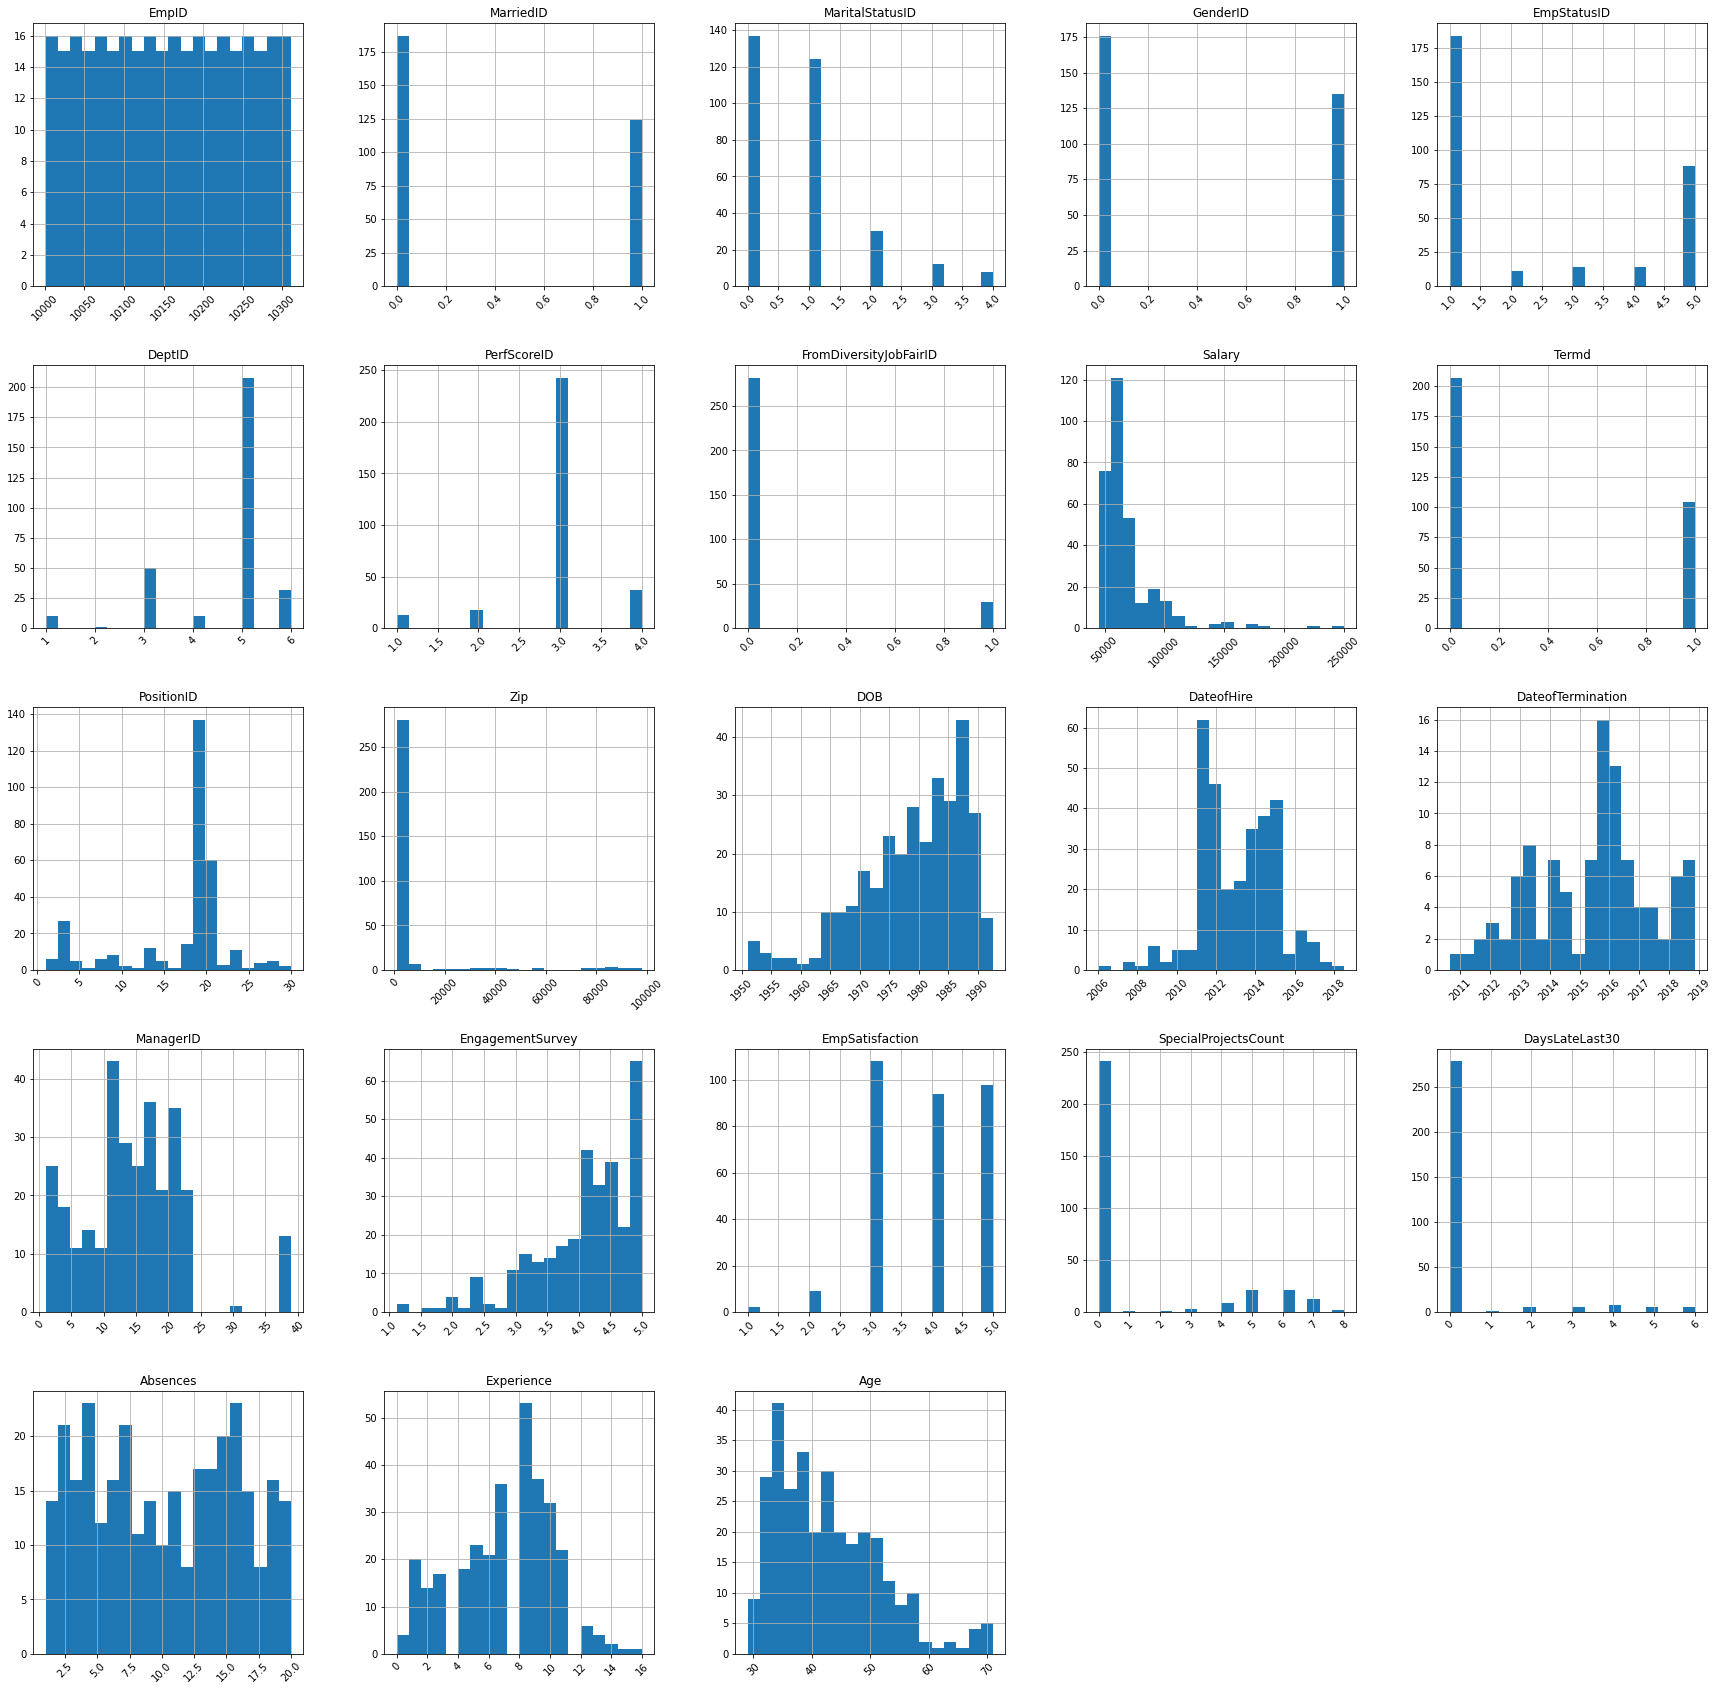

In [110]:
hr_data.hist(bins=20, figsize=(30,30), xrot=45)

Looking at the histogram of the numerical features, we can see some very interesting results. Roughly 60% of the employees at this company are single and the rest married. There are also 176 female employees and 134 males. The majority of the company works in the production department with 137 people as Production Technician I's. Salaries are right skewed, most likely similar to most other companies, with the majority making between \\$50,000 and \\$100,000. There also seems to be a lot of turnover at this company with about half of the people on the roster being terminated. Experience is roughly normally distributed while the age of employees is right skewed. Date of birth is left skewed, showing most employees are early in their career.

## Race, Gender, Age, and Nationality<a id='Race_Gender_Age_and_Nationality'></a>

<AxesSubplot:xlabel='RaceDesc', ylabel='Count'>

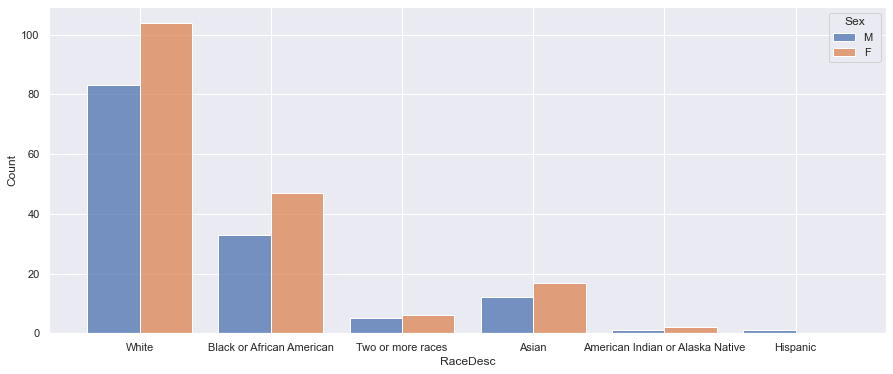

In [111]:
#Plot histogram of gender versus race
sns.set(rc={"figure.figsize":(15, 6)})
sns.histplot(data=hr_data, x='RaceDesc', hue='Sex', multiple='dodge', shrink=0.8)

From this chart, we can see both the distribution of race in the company as well as the distribution of gender. The majority of employees are White, followed by Black or African american, and Asian. Of every race, except Hispanic, the majority of employees identify as female. 

<AxesSubplot:xlabel='Department', ylabel='Count'>

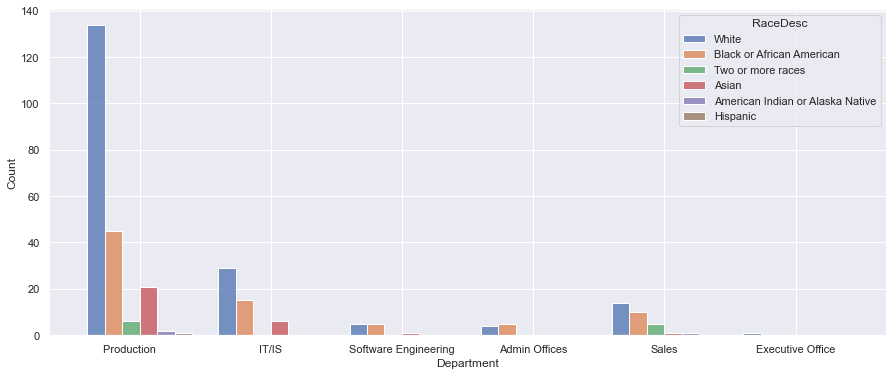

In [112]:
#Plot histogram of department versus race
sns.set(rc={"figure.figsize":(15, 6)})
sns.histplot(data=hr_data, x='Department', hue='RaceDesc', multiple='dodge', shrink=0.8)

Next, I wanted to look at the distribution of race over each department. From each department except admin, the majority of employees are White, especially the production department. The rest of the departments are less radically distributed, except for the executive office which only has a White individual. African American or Black employees make up the next largest group, followed by Asians.

<AxesSubplot:xlabel='Department', ylabel='Count'>

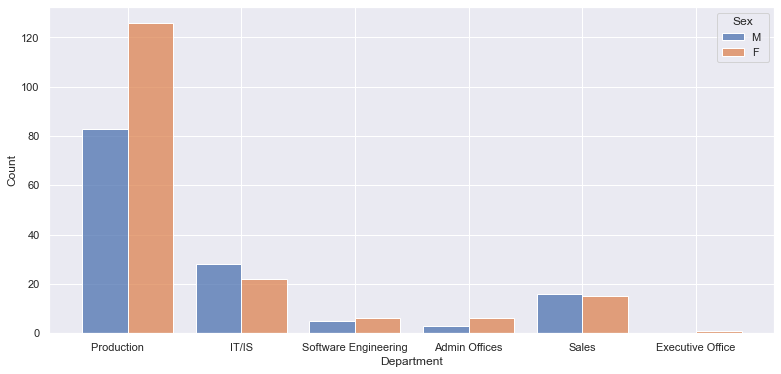

In [113]:
#Plot histogram of gender versus department
sns.set(rc={"figure.figsize":(13, 6)})
sns.histplot(data=hr_data, x='Department', hue='Sex', multiple='dodge', shrink=0.8)

Now comparing gender versus each department, we see that all departments, except for sales, are majority female. The sole white executive officer from the previous chart is also female. The largest disparity is again in the production department and the executive office (although this is only because there is one individual).

<AxesSubplot:xlabel='Age', ylabel='Count'>

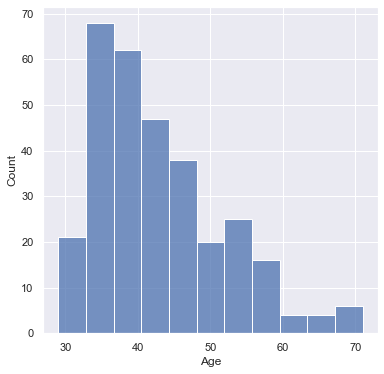

In [114]:
#Plot histogram of age
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data=hr_data, x='Age')

The spread of the employees' ages in the company is right skewed, with the most common age being around 35 years old and only a few employees near retirement age. 

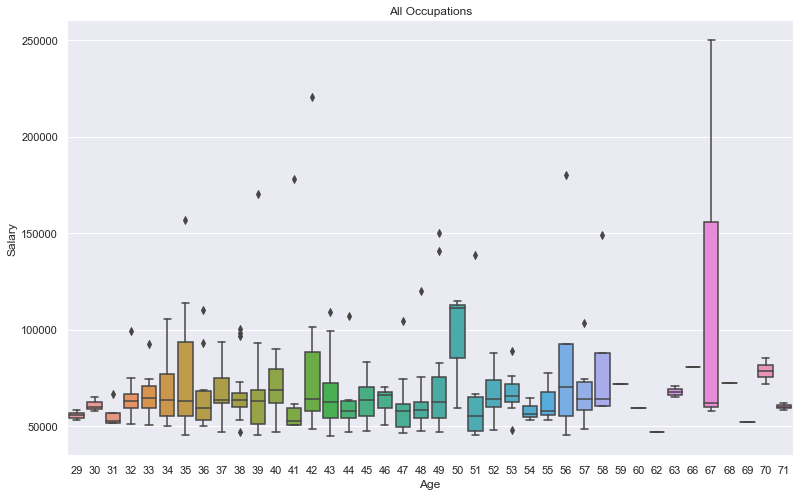

In [167]:
plt.figure(figsize=(13, 8))
sns.boxplot(x=hr_data['Age'], y=hr_data['Salary'])
plt.title('All Occupations')
plt.show()

The age versus salary histogram above is actually intersting as you can see there isn't a high correlation with people making more money as they age or if they are older. We do have a very intersting spread of salaries for 67 year old employees and also 50 year old employees making more on average. Other than that, salary and age don't seem to have any interesting correlations.

<AxesSubplot:xlabel='CitizenDesc', ylabel='Count'>

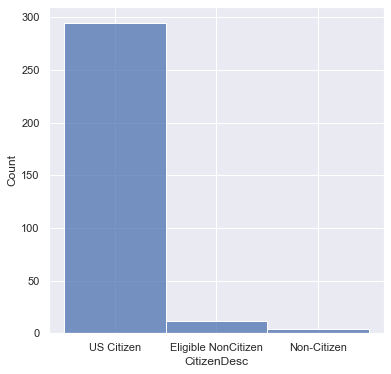

In [115]:
#Plot histogram of nationality
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data=hr_data, x='CitizenDesc')

Almost all of the employees in the company are US citizens. A small amount of the employees are eligible non-citizens with maybe only one non-citizen.

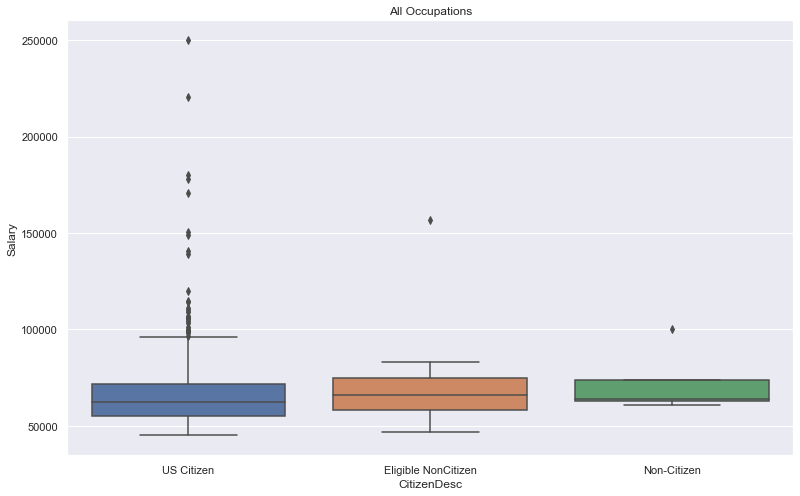

In [168]:
plt.figure(figsize=(13, 8))
sns.boxplot(x=hr_data['CitizenDesc'], y=hr_data['Salary'])
plt.title('All Occupations')
plt.show()

Above is the distribution of salaries between the different nationality descriptions. They are farily equal across the board, although US citizens have more outlier employees making more money.

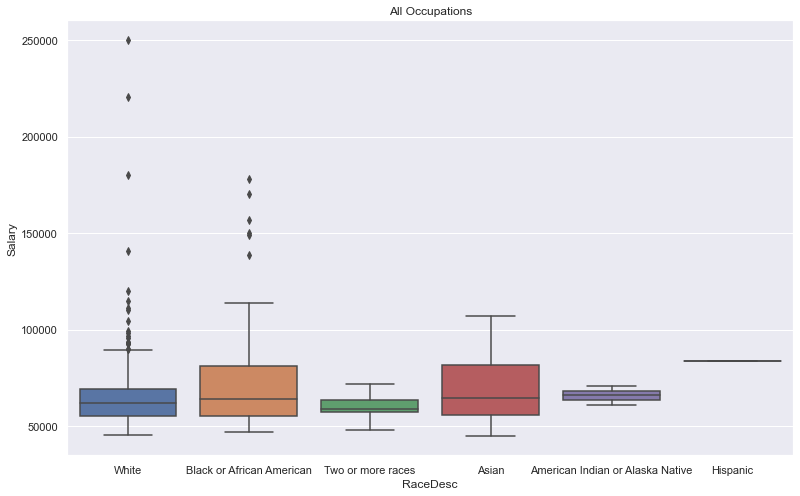

In [163]:
plt.figure(figsize=(13, 8))
sns.boxplot(x=hr_data['RaceDesc'], y=hr_data['Salary'])
plt.title('All Occupations')
plt.show()

One of my main questions on seeing this dataset was how different ethnicities and genders compared on pay scales. Above, are box plots of each ethnicity compared to their salary distribution. White employees not only make the highest salary, but also have the most outliers. The median pay for all ethnicities is actually fairly close. African American and Asian employees have the biggest difference in 75th and 25th percentiles. Especially taking into account the outliers, pay does not seem to be equally distributed between ethnicities. 

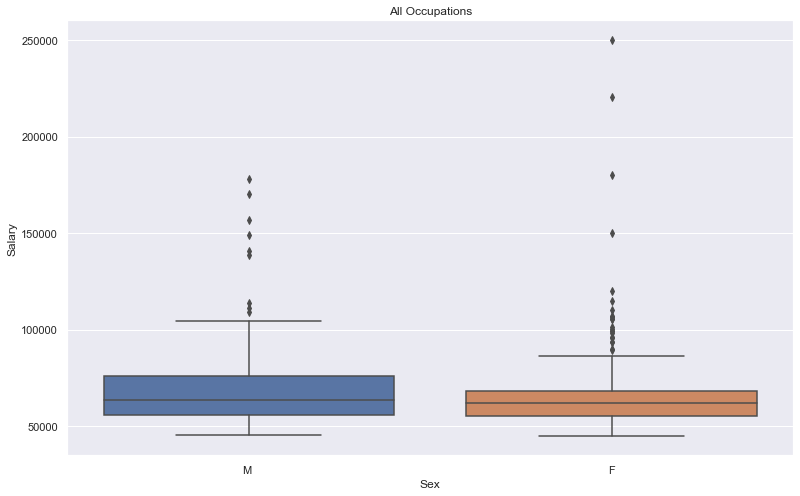

In [165]:
plt.figure(figsize=(13, 8))
sns.boxplot(x=hr_data['Sex'], y=hr_data['Salary'])
plt.title('All Occupations')
plt.show()

Taking another look at gender, we can see the difference in salary above. Male employees tend to have a higher 75th percentile and maximum value. However, female employees do have the highest outlier wages. Like with ethnicity, it still seems males are payed higher unless they are outlier employees.

## Salary, Experience, and Positions<a id='Salary_Experience_and_Positions'></a>

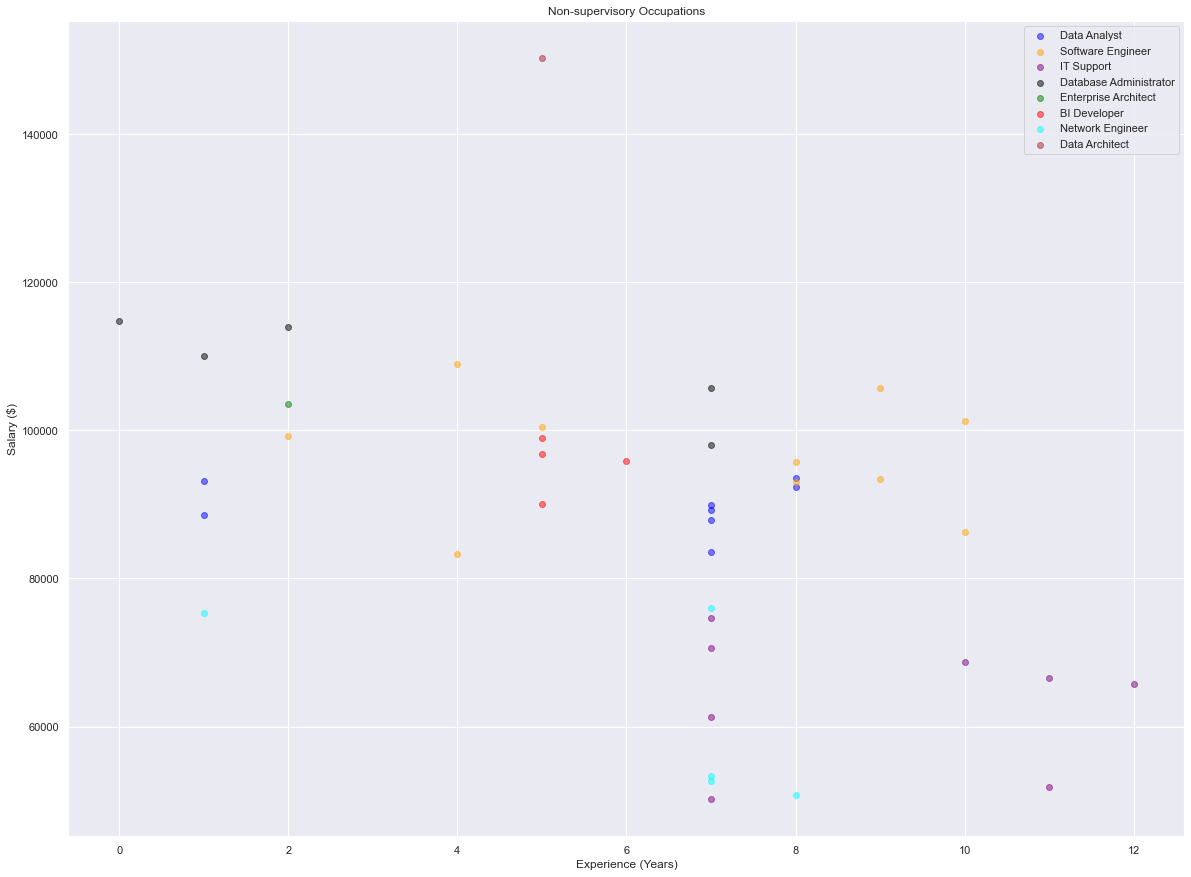

In [116]:
plt.figure(figsize=(20, 15))
plt.scatter(Data_Analyst['Experience'], Data_Analyst['Salary'], label='Data Analyst', color='blue', alpha=0.5)
plt.scatter(Software_Engineer['Experience'], Software_Engineer['Salary'], label='Software Engineer', color='orange', alpha=0.5)
plt.scatter(IT_Support['Experience'], IT_Support['Salary'], label='IT Support', color='purple', alpha=0.5)
plt.scatter(Database_Admin['Experience'], Database_Admin['Salary'], label='Database Administrator', color='black', alpha=0.5)
plt.scatter(Enterprise_Architect['Experience'], Enterprise_Architect['Salary'], label='Enterprise Architect', color='green', alpha=0.5)
plt.scatter(BI_Developer['Experience'], BI_Developer['Salary'], label='BI Developer', color='red', alpha=0.5)
plt.scatter(Network_Engineer['Experience'], Network_Engineer['Salary'], label='Network Engineer', color='cyan', alpha=0.5)
plt.scatter(Data_Architect['Experience'], Data_Architect['Salary'], label='Data Architect', color='brown', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.title('Non-supervisory Occupations')
plt.show()

Here I've plotted salary versus experience and color coded the results per occupation. I've only plotted some of the occupations as to reduce the clutter of the scatter plot. The highest paid occupation of those shown is the data architect with 5 years of experience. Overall there is an interesting trend where the more experience people have it seems like the less they make. This could be due to new hires coming in with higher wages, but this could be reflective of why the company has high turnover. The people with the most experience at this company appear to be in IT support followed by software engineers.

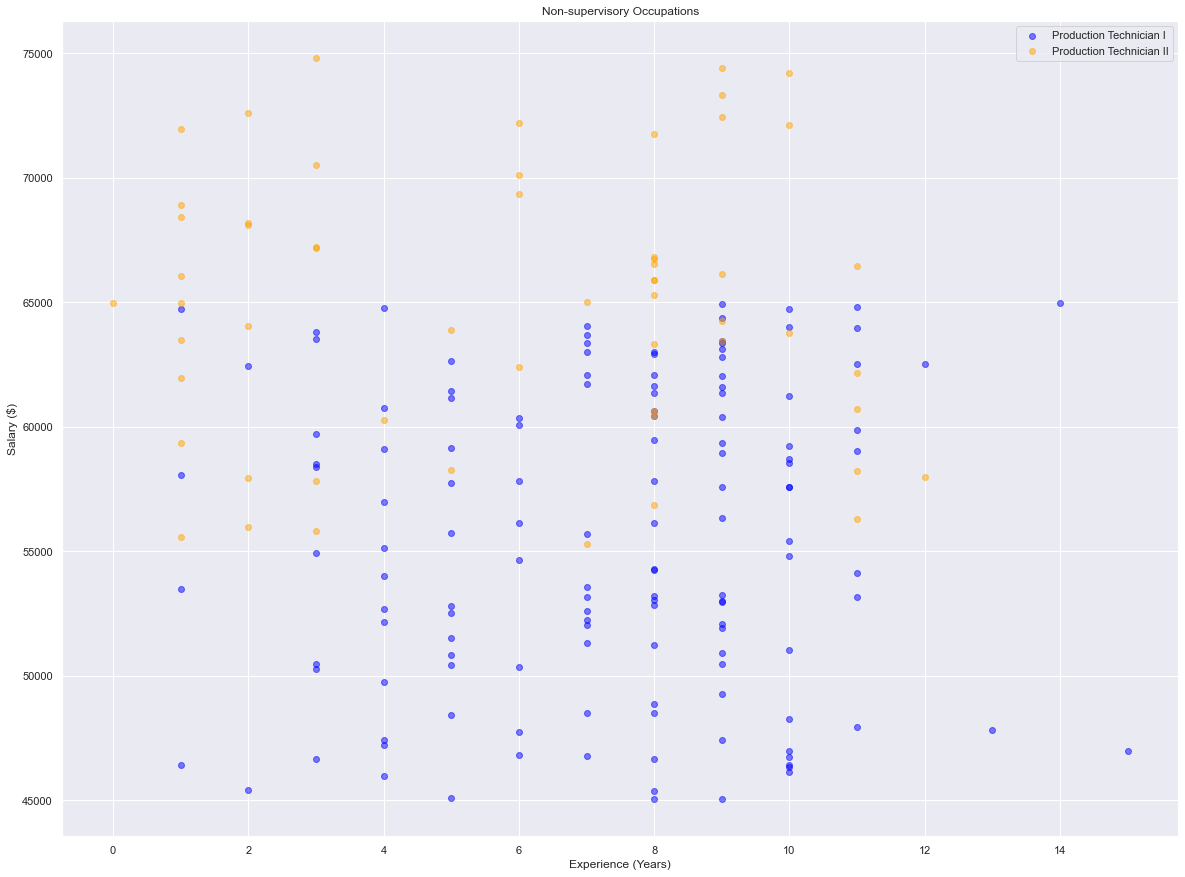

In [139]:
plt.figure(figsize=(20, 15))
plt.scatter(Production_Technician_I['Experience'], Production_Technician_I['Salary'], label='Production Technician I', color='blue', alpha=0.5)
plt.scatter(Production_Technician_II['Experience'], Production_Technician_II['Salary'], label='Production Technician II', color='orange', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.title('Non-supervisory Occupations')
plt.show()

Since production has the most employees, I've split out the non-supervisory production personnel onto their own chart. As one may predict, production technician II's tend to make more money than production technician I's with the same or similar experience. It is interesting to note that salary doesn't seem to increase much with experience for production personnel.

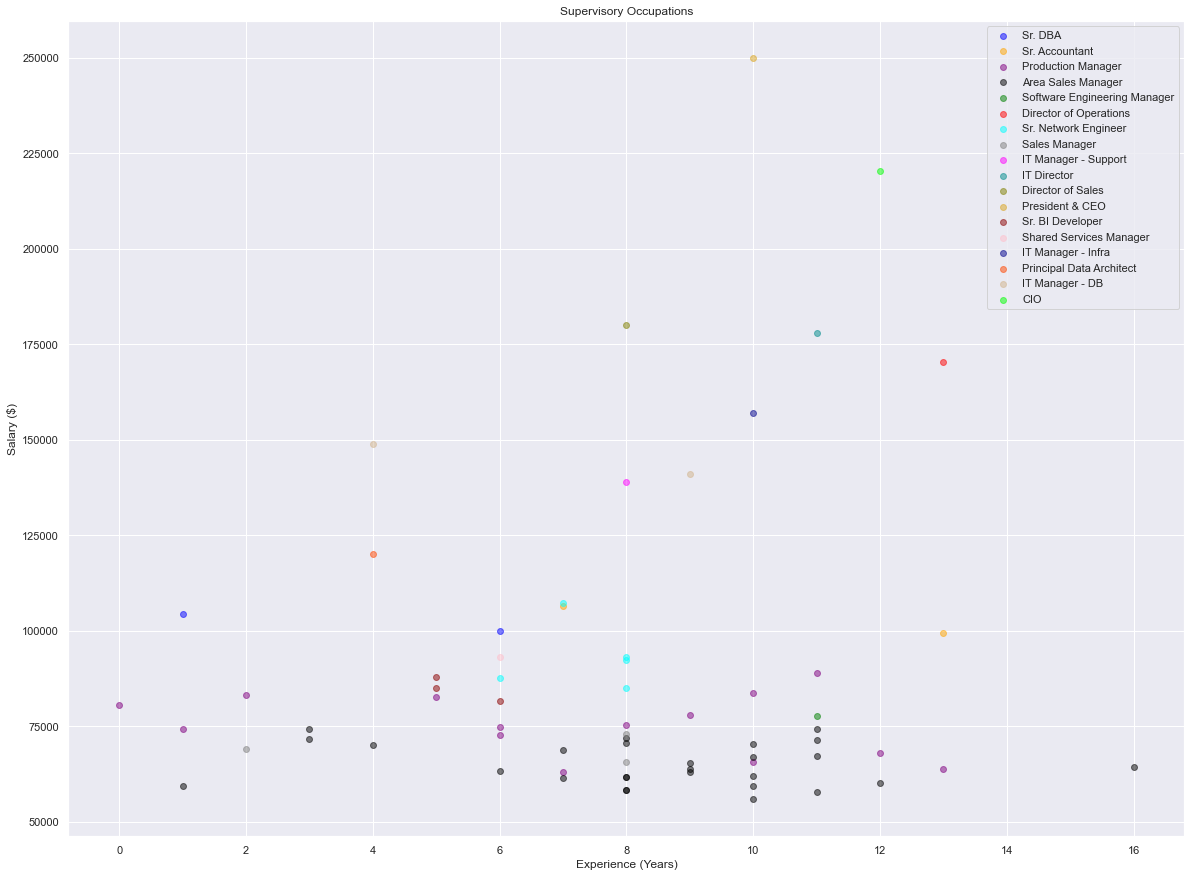

In [117]:
plt.figure(figsize=(20, 15))
plt.scatter(Sr_DBA['Experience'], Sr_DBA['Salary'], label='Sr. DBA', color='blue', alpha=0.5)
plt.scatter(Sr_Accountant['Experience'], Sr_Accountant['Salary'], label='Sr. Accountant', color='orange', alpha=0.5)
plt.scatter(Production_Manager['Experience'], Production_Manager['Salary'], label='Production Manager', color='purple', alpha=0.5)
plt.scatter(Area_Sales_Manager['Experience'], Area_Sales_Manager['Salary'], label='Area Sales Manager', color='black', alpha=0.5)
plt.scatter(Software_Engineering_Manager['Experience'], Software_Engineering_Manager['Salary'], label='Software Engineering Manager', color='green', alpha=0.5)
plt.scatter(Director_Operations['Experience'], Director_Operations['Salary'], label='Director of Operations', color='red', alpha=0.5)
plt.scatter(Sr_Network_Engineer['Experience'], Sr_Network_Engineer['Salary'], label='Sr. Network Engineer', color='cyan', alpha=0.5)
plt.scatter(Sales_Manager['Experience'], Sales_Manager['Salary'], label='Sales Manager', color='gray', alpha=0.5)
plt.scatter(IT_Manager_Support['Experience'], IT_Manager_Support['Salary'], label='IT Manager - Support', color='magenta', alpha=0.5)
plt.scatter(IT_Director['Experience'], IT_Director['Salary'], label='IT Director', color='darkcyan', alpha=0.5)
plt.scatter(Director_Sales['Experience'], Director_Sales['Salary'], label='Director of Sales', color='olive', alpha=0.5)
plt.scatter(Pres_CEO['Experience'], Pres_CEO['Salary'], label='President & CEO', color='goldenrod', alpha=0.5)
plt.scatter(Sr_BI_Developer['Experience'], Sr_BI_Developer['Salary'], label='Sr. BI Developer', color='darkred', alpha=0.5)
plt.scatter(Shared_Services_Manager['Experience'], Shared_Services_Manager['Salary'], label='Shared Services Manager', color='pink', alpha=0.5)
plt.scatter(IT_Manager_Infra['Experience'], IT_Manager_Infra['Salary'], label='IT Manager - Infra', color='darkblue', alpha=0.5)
plt.scatter(Principal_Data_Architect['Experience'], Principal_Data_Architect['Salary'], label='Principal Data Architect', color='orangered', alpha=0.5)
plt.scatter(IT_Manager_DB['Experience'], IT_Manager_DB['Salary'], label='IT Manager - DB', color='tan', alpha=0.5)
plt.scatter(CIO['Experience'], CIO['Salary'], label='CIO', color='lime', alpha=0.5)

plt.legend(loc='upper right')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.title('Supervisory Occupations')
plt.show()

Contrary to the low level positions, manager positions tend to make more money as they increase in experience. The CEO, CIO, and other directors and some managers make the most money in the company. Sales and production managers have the most experience while also making less money, often less than those with less experience.

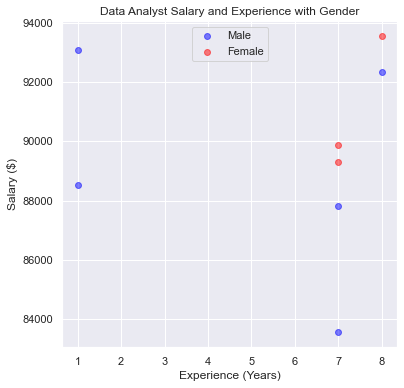

In [118]:
plt.scatter(Data_Analyst[Data_Analyst['GenderID'] == 1]['Experience'], Data_Analyst[Data_Analyst['GenderID'] == 1]['Salary'], label='Male', color='blue', alpha=0.5)
plt.scatter(Data_Analyst[Data_Analyst['GenderID'] == 0]['Experience'], Data_Analyst[Data_Analyst['GenderID'] == 0]['Salary'], label='Female', color='red', alpha=0.5)
plt.legend(loc='upper center')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.title('Data Analyst Salary and Experience with Gender')
plt.show()

Here, I wanted to take a look just at data analyst positions in terms of salary and experience, as well as the gender wage gap. At this company, there is some disparity between the amount of money paid per years of expereince, especially with the male employees. Female employees at this company are also paid better than most of their male counterparts, and better than those with the same experience levels.

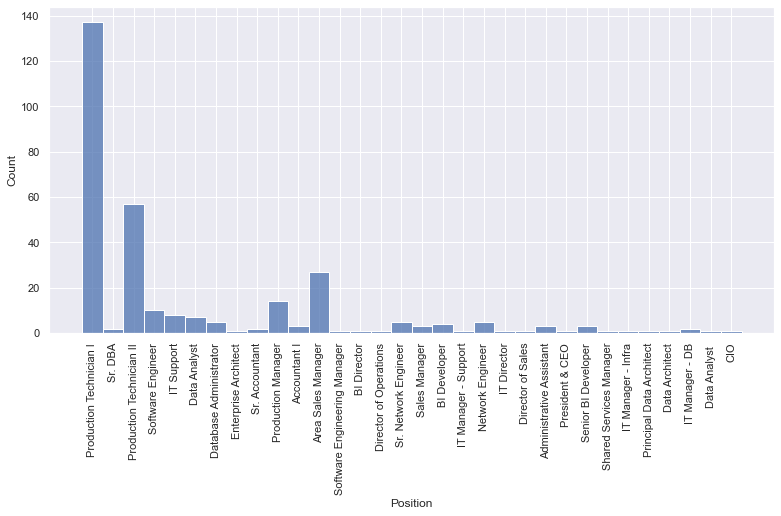

In [138]:
#Plot histogram of positions
plt.figure(figsize=(13,6))
chart = sns.histplot(data=hr_data, x='Position')
plt.xticks(rotation=90, horizontalalignment='center')
None

This final histogram shows the amount of employees in each job position listed in the dataset. The majority of workers in this company work as production technicians followed by sales managers. During my data wrangling, I did find that one data analyst was misclassified with an extra space in the name which made them have an extra slot in the above histogram. This error was rectified in the scatter plot data.

## Summary<a id='Summary'></a>

Throughout this process I have been able to extrapolate meaningful analysis from this dataset. Initially, I was interested in determining interactions between salary and features such as gender, age, ethnicity and nationality. I've also inspected the dataset for the distribution of these features themselves to see how well balanced this company is in hiring diversity.

The majority of employees are White, followed by Black or African American, and Asian. Of every race, except Hispanic, the majority of employees identify as female. From each department except admin, the majority of employees are White, especially the production department. The rest of the departments are less radically distributed, except for the executive office which only has a White individual. African American or Black employees make up the next largest group, followed by Asians. All departments, except for sales, are majority female. The sole white executive officer is also female. The largest disparity is again in the production department and the executive office (although this is only because there is one individual). The spread of the employees' ages in the company is right skewed, with the most common age being around 35 years old and only a few employees near retirement age. There isn't a high correlation with people making more money as they age or if they are older. We do have a very intersting spread of salaries for 67 year old employees and also 50 year old employees making more on average. Other than that, salary and age don't seem to have any interesting correlations. Almost all of the employees in the company are US citizens. A small amount of the employees are eligible non-citizens with maybe only one non-citizen. The salary between nationalities is fairly equally spread across the board, although US citizens have more outlier employees making more money. White employees not only make the highest salary, but also have the most outliers. The median pay for all ethnicities is actually fairly close. African American and Asian employees have the biggest difference in 75th and 25th percentiles. Especially taking into account the outliers, pay does not seem to be equally distributed between ethnicities. Male employees tend to have a higher 75th percentile and maximum value. However, female employees do have the highest outlier wages. Like with ethnicity, it still seems males are payed higher unless they are outlier employees. 

The highest paid occupation of those listed is the data architect with 5 years of experience. Overall there is an interesting trend where the more experience people have it seems like the less they make. This could be due to new hires coming in with higher wages, but this could be reflective of why the company has high turnover. The people with the most experience at this company appear to be in IT support followed by software engineers. Production technician II's tend to make more money than production technician I's with the same or similar experience. It is interesting to note that salary doesn't seem to increase much with experience for production personnel. Contrary to the low level positions, manager positions tend to make more money as they increase in experience. The CEO, CIO, and other directors and some managers make the most money in the company. Sales and production managers have the most experience while also making less money, often less than those with less experience. I then focused just on data analyst positions and found that there is some disparity between the amount of money paid per years of expereince, especially with the male employees. Female data analysts at this company are also paid better than most of their male counterparts, and better than those with the same experience levels. Finally, the majority of workers in this company work as production technicians followed by sales managers.